<a href="https://colab.research.google.com/github/vlillop/Ciencia-de-Datoa-IBM/blob/main/House_Sales_in_King_Count_USA_20231003_1696291200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: House Sales in King County, USA**

In [ ]:
import requests
import pandas as pd

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
file_name = "housing.csv"

# Descargar el archivo CSV
response = requests.get(url)
if response.status_code == 200:
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f"Archivo descargado correctamente como: {file_name}")
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")

# Leer el archivo en un DataFrame
df = pd.read_csv(file_name)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

Archivo descargado correctamente como: housing.csv
Primeras filas del DataFrame:
   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_bu

**Question 1**

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [ ]:
# Mostrar los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(df.dtypes)


Tipos de datos de cada columna:
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.

In [ ]:
# Get a statistical summary of the DataFrame
print(df.describe())

        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.08651

**Question 2**

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [ ]:
# Drop the columns "id" and "Unnamed: 0" from the DataFrame
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# Get a statistical summary of the updated DataFrame
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

We can see we have missing values for the columns  bedrooms and  bathrooms

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True

In [17]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). Don't forget to set the  inplace  parameter top  True

In [18]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [19]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# **Module 3: Exploratory Data Analysis**

**Question 3**

Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [20]:
# Count the number of houses with unique floor values and convert to a DataFrame
floor_counts = df['floors'].value_counts().to_frame()

# Rename the column for better readability (optional)
floor_counts.rename(columns={'floors': 'count'}, inplace=True)

# Display the result
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


**Question 4**

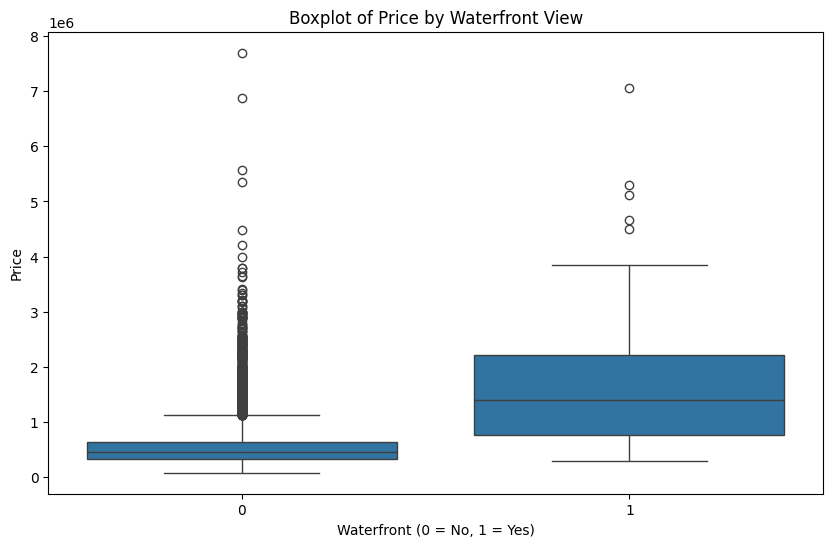

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for price grouped by waterfront view
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better readability
sns.boxplot(x='waterfront', y='price', data=df)

# Add labels and a title
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.title("Boxplot of Price by Waterfront View")
plt.show()

**Question 5**

Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.

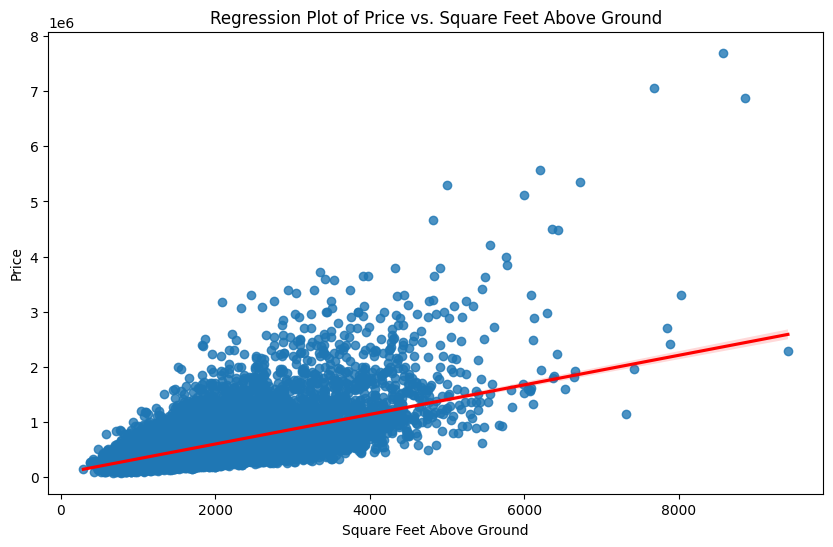

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot for sqft_above vs. price
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.regplot(x='sqft_above', y='price', data=df, line_kws={"color": "red"})

# Add labels and a title
plt.xlabel("Square Feet Above Ground")
plt.ylabel("Price")
plt.title("Regression Plot of Price vs. Square Feet Above Ground")
plt.show()

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [26]:
# Drop the non-numerical column 'date' (if needed)
df.drop(columns=['date'], inplace=True)

# Recalculate the correlation
correlation_matrix = df.corr()
price_correlations = correlation_matrix["price"].sort_values(ascending=False)

# Display the most correlated feature other than price
print("Most correlated feature with price (other than price itself):")
print(price_correlations[1:2])

Most correlated feature with price (other than price itself):
sqft_living    0.702035
Name: price, dtype: float64


**Module 4: Model Development**

We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [27]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

**Question 6**

Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Extract the features (X) and target variable (y)
X = df[['sqft_living']]  # Feature must be a 2D array
y = df['price']          # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 value
print(f"R^2 Value: {r2:.4f}")

R^2 Value: 0.4941


**Question 7**

Fit a linear regression model to predict the 'price' using the list of features:

In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Extract the features (X) and target variable (y)
X = df[['sqft_living']]  # Feature must be a 2D array
y = df['price']          # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 value
print(f"R^2 Value: {r2:.4f}")

R^2 Value: 0.4941


**This will help with Question 8**

Create a list of tuples, the first element in the tuple contains the name of the estimator:
'scale'
'polynomial'
'model'
The second element in the tuple contains the model constructor
StandardScaler()
PolynomialFeatures(include_bias=False)
LinearRegression()

In [31]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

**Question 8**

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define the features and target variable
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
X = df[features]  # Features from the DataFrame
y = df['price']   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline object
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Standardize the features
    ('model', LinearRegression())  # Linear regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 value
print(f"R^2 Value: {r2:.4f}")

R^2 Value: 0.5093


# **Module 5: Model Evaluation and Refinement**

Import the necessary modules:

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [34]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


**Question 9**

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [35]:
from sklearn.linear_model import Ridge

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define the features and target variable
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
X = df[features]  # Features from the DataFrame
y = df['price']   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression object with regularization parameter alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 value
print(f"R^2 Value: {r2:.4f}")

R^2 Value: 0.5093


**Question 10**

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [38]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformación polinómica en datos escalados
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)
y_pred = ridge_model.predict(X_test_poly)

# R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Value: {r2:.4f}")

R^2 Value: 0.4730
